## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! **Note that the practice problems will be checked when submitted!**

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [2]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [3]:
#TODO: read the cookies.csv file into a pandas dataframe
cookies = pd.read_csv('cookies.csv')

#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [4]:
#TODO: print the head of the dataframe
print(cookies.head())

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
4  bad berry bunny           ["flour","blueberries","sugar","butter"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
3       198   3.780          1.07  
4       191   4.148          1.39  


### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [5]:
#TODO: check the data types of the columns
print(cookies.dtypes)

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object


Now, lets use use `info()` function to get more information about the Dataframe

In [6]:
# TODO: use info() to get information about datatypes and null values
print(cookies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        129 non-null    object 
 1   ingredients   129 non-null    object 
 2   calories      129 non-null    int64  
 3   radius        129 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ KB
None


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [7]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect
cookies.dropna(subset=['cost_to_make'], inplace=True)
print(cookies.head())

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
4  bad berry bunny           ["flour","blueberries","sugar","butter"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
3       198   3.780          1.07  
4       191   4.148          1.39  


To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [8]:
#TODO: use the isnull method to make sure your data is clean
print(cookies.isnull().sum())

cookie          0
ingredients     0
calories        0
radius          0
cost_to_make    0
dtype: int64


Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [9]:
# TODO: check for duplicate rows
# then delete those rows form df

# check duplicate rows
duplicate_idxs = cookies.duplicated()
duplicate_rows = cookies[duplicate_idxs]

# print duplicate rows
print(duplicate_rows)

# remove duplicate rows
cookies.drop_duplicates(inplace=True)

              cookie                                        ingredients  \
3    red velvet rauw  ["flour","cocoa powder","butter","red food col...   
15      orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
16       minty miami          ["flour","mint extract","sugar","butter"]   
20   red velvet rauw  ["flour","cocoa powder","butter","red food col...   
26      orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
27       minty miami          ["flour","mint extract","sugar","butter"]   
33   red velvet rauw  ["flour","cocoa powder","butter","red food col...   
120      minty miami          ["flour","mint extract","sugar","butter"]   
123     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
124      minty miami          ["flour","mint extract","sugar","butter"]   
128        chocolate       ["flour","chocolate chips","sugar","butter"]   

     calories  radius  cost_to_make  
3         198   3.780          1.07  
15        162   3.241  

### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [10]:
#TODO: see what cookies are in the dataset
cookie_types = cookies['cookie'].unique()
print('Cookie Types: \n')
for c in cookie_types:
    print(c)

Cookie Types: 

laddoo lemon
red velvet rauw
nevadito
bad berry bunny
orange ozuna
minty miami
chocolate


We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [11]:
#TODO: use value_counts() to see how many 
# cookies of each type there are

print("No. of Cookies: \n")
print(cookies['cookie'].value_counts())

No. of Cookies: 

red velvet rauw    17
orange ozuna       16
nevadito           15
bad berry bunny    15
minty miami        15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64


Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [12]:
#TODO: change bad berry bunny data elements to "bbb"
cookies['cookie'] = cookies['cookie'].replace("bad berry bunny", "bbb")
print(cookies.head())

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4              bbb           ["flour","blueberries","sugar","butter"]   
5     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
4       191   4.148          1.39  
5       162   3.241          1.15  


We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [13]:
#TODO: adjust orange ozuna as described
cookies['cookie'] = cookies['cookie'].str.replace(" ", "_")
print(cookies.head())

            cookie                                        ingredients  \
0     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
4              bbb           ["flour","blueberries","sugar","butter"]   
5     orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
4       191   4.148          1.39  
5       162   3.241          1.15  


We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [14]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name
cookies['cookie'] = cookies['cookie'].str.split('_').str[0]
print(cookies.head())

     cookie                                        ingredients  calories  \
0    laddoo             ["flour","lemon juice","sugar","ghee"]       170   
1       red  ["flour","cocoa powder","butter","red food col...       198   
2  nevadito  ["flour","chocolate chips","milk","vanilla ext...       224   
4       bbb           ["flour","blueberries","sugar","butter"]       191   
5    orange   ["flour","orange juice","sugar","vegetable oil"]       162   

   radius  cost_to_make  
0   3.102          0.67  
1   3.780          1.07  
2   4.069          1.04  
4   4.148          1.39  
5   3.241          1.15  


Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [15]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
cookies['cost_to_make'] = cookies['cost_to_make'].apply(adjust_cost)
print(cookies['cost_to_make'].head())

0    1.17
1    1.57
2    1.54
4    1.89
5    1.65
Name: cost_to_make, dtype: float64


And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before trying out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [16]:
# TODO: sort the df using sort_values(by='Column', ascending=False)
cookies = cookies.sort_values(by='radius', ascending=False)
print(cookies.head())

     cookie                                        ingredients  calories  \
110     red  ["flour","cocoa powder","butter","red food col...       198   
30      red  ["flour","cocoa powder","butter","red food col...       204   
60   orange   ["flour","orange juice","sugar","vegetable oil"]       186   
49   laddoo             ["flour","lemon juice","sugar","ghee"]       195   
101  laddoo             ["flour","lemon juice","sugar","ghee"]       178   

     radius  cost_to_make  
110   4.930          1.55  
30    4.667          1.90  
60    4.573          1.56  
49    4.562          1.12  
101   4.519          1.91  


We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [17]:
#TODO: group by cookie type


We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [18]:
#TODO: group by cookie type and ingredients

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [19]:
#TODO: filter using the boolean expression
print(cookies[cookies['radius'] > 4.3].head())

     cookie                                        ingredients  calories  \
110     red  ["flour","cocoa powder","butter","red food col...       198   
30      red  ["flour","cocoa powder","butter","red food col...       204   
60   orange   ["flour","orange juice","sugar","vegetable oil"]       186   
49   laddoo             ["flour","lemon juice","sugar","ghee"]       195   
101  laddoo             ["flour","lemon juice","sugar","ghee"]       178   

     radius  cost_to_make  
110   4.930          1.55  
30    4.667          1.90  
60    4.573          1.56  
49    4.562          1.12  
101   4.519          1.91  


We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [20]:
#TODO: filter the data using the boolean expression
# then group by cookie column
cookies_grouped_df = cookies[cookies['radius'] > 4.3].groupby('cookie')
print(cookies_grouped_df.head())

        cookie                                        ingredients  calories  \
110        red  ["flour","cocoa powder","butter","red food col...       198   
30         red  ["flour","cocoa powder","butter","red food col...       204   
60      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
49      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
101     laddoo             ["flour","lemon juice","sugar","ghee"]       178   
97         red  ["flour","cocoa powder","butter","red food col...       191   
87   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
72         red  ["flour","cocoa powder","butter","red food col...       196   
88      laddoo             ["flour","lemon juice","sugar","ghee"]       167   
47       minty          ["flour","mint extract","sugar","butter"]       174   
29    nevadito  ["flour","chocolate chips","milk","v

We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [21]:
#TODO: add a column to the dataframe that is the
# calories per radius
cookies['calories_per_radius'] =  cookies.apply(lambda row: row.calories / row.radius, axis=1)
print(cookies.head())

     cookie                                        ingredients  calories  \
110     red  ["flour","cocoa powder","butter","red food col...       198   
30      red  ["flour","cocoa powder","butter","red food col...       204   
60   orange   ["flour","orange juice","sugar","vegetable oil"]       186   
49   laddoo             ["flour","lemon juice","sugar","ghee"]       195   
101  laddoo             ["flour","lemon juice","sugar","ghee"]       178   

     radius  cost_to_make  calories_per_radius  
110   4.930          1.55            40.162272  
30    4.667          1.90            43.711163  
60    4.573          1.56            40.673518  
49    4.562          1.12            42.744410  
101   4.519          1.91            39.389245  


Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [22]:
#TODO: drop the created column
cookies.drop(['calories_per_radius'], axis = 1, inplace = True)

### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

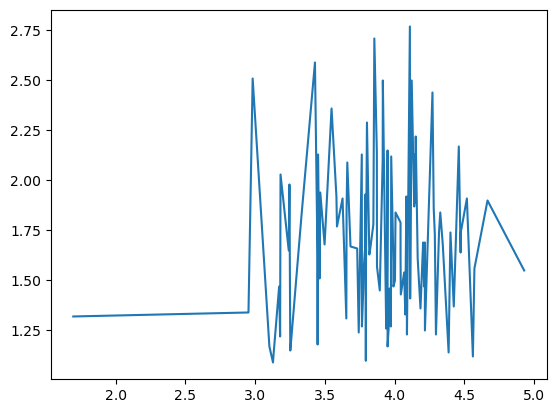

In [23]:
#TODO: plot the radius (x) versus cost to make (y)
import matplotlib.pyplot as plt
plt.plot(cookies['radius'], cookies['cost_to_make'])

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

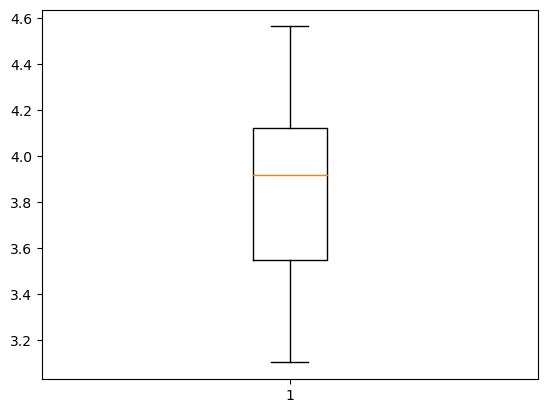

In [24]:
#TODO: add the described boxplot
# remember that you changed the name from laddoo lemon to laddoo
plt.boxplot(cookies.loc[cookies['cookie'] == 'laddoo', 'radius'])
plt.show()

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

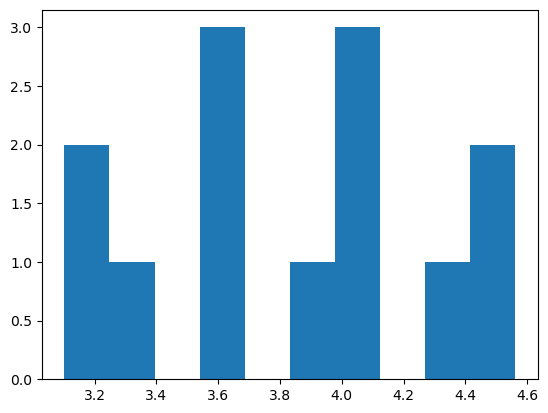

In [25]:
#TODO: add the described histogram
plt.hist(cookies.loc[cookies['cookie'] == 'laddoo', 'radius'])
plt.show()

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

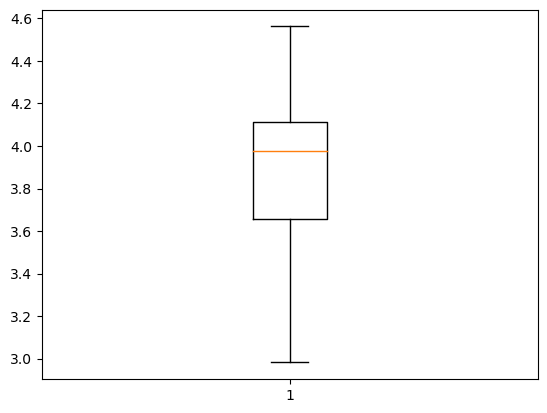

In [26]:
#TODO: analyze the two cookie's radius in a boxplot
plt.boxplot(cookies.loc[((cookies['cookie'] == 'laddoo') | (cookies['cookie'] == 'bbb')), 'radius'])
plt.show()

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [27]:
#Add your code here
print(cookies.shape[0])

103


#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [28]:
#Add your code here
cookies['r_>_4'] = cookies['radius'].apply(lambda x : (x > 4))
print(cookies.head())

     cookie                                        ingredients  calories  \
110     red  ["flour","cocoa powder","butter","red food col...       198   
30      red  ["flour","cocoa powder","butter","red food col...       204   
60   orange   ["flour","orange juice","sugar","vegetable oil"]       186   
49   laddoo             ["flour","lemon juice","sugar","ghee"]       195   
101  laddoo             ["flour","lemon juice","sugar","ghee"]       178   

     radius  cost_to_make  r_>_4  
110   4.930          1.55   True  
30    4.667          1.90   True  
60    4.573          1.56   True  
49    4.562          1.12   True  
101   4.519          1.91   True  


#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [29]:
#Add your code here
cookies['avg_radius'] = cookies.groupby('cookie')['radius'].transform('mean')
print(cookies.head())

     cookie                                        ingredients  calories  \
110     red  ["flour","cocoa powder","butter","red food col...       198   
30      red  ["flour","cocoa powder","butter","red food col...       204   
60   orange   ["flour","orange juice","sugar","vegetable oil"]       186   
49   laddoo             ["flour","lemon juice","sugar","ghee"]       195   
101  laddoo             ["flour","lemon juice","sugar","ghee"]       178   

     radius  cost_to_make  r_>_4  avg_radius  
110   4.930          1.55   True    4.106471  
30    4.667          1.90   True    4.106471  
60    4.573          1.56   True    3.506125  
49    4.562          1.12   True    3.849000  
101   4.519          1.91   True    3.849000  


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [30]:
#Add your code here
cookies_chocolate_chips = cookies[(cookies['ingredients'].str.contains('chocolate chips'))]
print(cookies_chocolate_chips.head())

       cookie                                        ingredients  calories  \
87  chocolate       ["flour","chocolate chips","sugar","butter"]       199   
80  chocolate       ["flour","chocolate chips","sugar","butter"]       197   
29   nevadito  ["flour","chocolate chips","milk","vanilla ext...       219   
62  chocolate       ["flour","chocolate chips","sugar","butter"]       206   
55  chocolate       ["flour","chocolate chips","sugar","butter"]       229   

    radius  cost_to_make  r_>_4  avg_radius  
87   4.474          1.64   True    4.062833  
80   4.461          2.17   True    4.062833  
29   4.346          1.68   True    3.959000  
62   4.328          1.84   True    4.062833  
55   4.217          1.69   True    4.062833  


#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

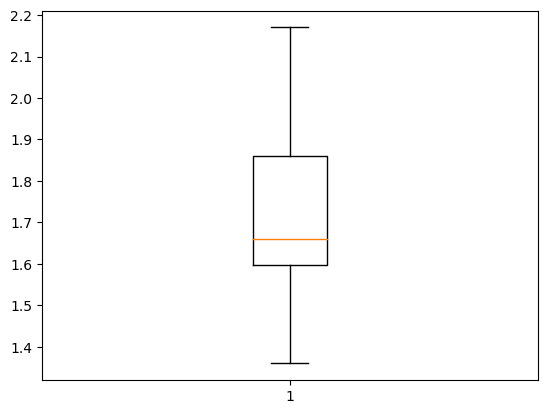

In [31]:
#Add your code here
plt.boxplot(cookies.loc[(cookies['cookie'] == 'chocolate'), "cost_to_make"].values)
plt.show()

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

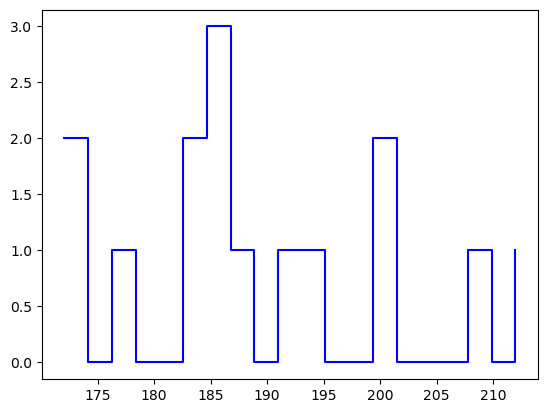

In [32]:
#Add your code here

# creating a histogram-like plot using pyplot.plot by manually calculating the histogram bins and plotting them as vertical lines
import numpy as np
data = cookies.loc[(cookies['cookie'] == 'bbb'), 'calories'].values

# Calculate histogram bins and frequencies
hist, bins = np.histogram(data, bins=20)
# Calculate the width of each bin
bin_width = bins[1] - bins[0]
# Calculate the x-values for the midpoints of each bin
bin_centers = (bins[:-1] + bins[1:]) / 2
# Create a histogram-like plot using vertical lines
plt.plot(bin_centers, hist, linestyle='-', color='b', drawstyle='steps-post')

#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

<Axes: xlabel='cookie'>

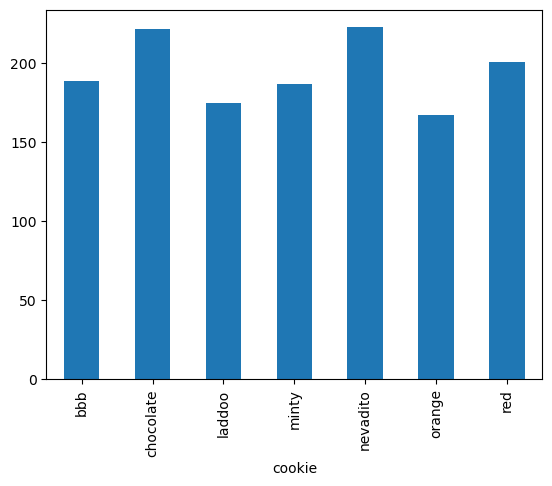

In [33]:
#Add your code here
cookies.groupby('cookie')['calories'].agg('mean').plot.bar()

#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [34]:
#Add your code here
cookies.sort_values(by = 'cost_to_make', ascending = False).reset_index(drop = True).head(3)

,cookie,ingredients,calories,radius,cost_to_make,r_>_4,avg_radius
0,laddoo,"[""flour"",""lemon juice"",""sugar"",""ghee""]",176,4.110,2.77,True,3.849000
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",220,3.855,2.71,False,3.959000
2,orange,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",159,3.429,2.59,False,3.506125
